In [22]:
from data_packager import *
import matplotlib.pyplot as plt


plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 1)
})


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

# Development Data

## Development Dataset 0: AddNIST
The first development dataset was called AddNIST. Each image contains three MNIST images, one in each of the RGB channels. The output class is $(r + g + b) - 1$, where $r$, $g$, and $b$ refer to the digits represented by the three MNIST images. The three images are chosen such that $(r+g+b)-1 < 20$.

The train and validation split use Torch MNIST train images, while test split uses test images. Combinations are chosen at random, but weighted such that each of the 20 classes are evenly represented in bopth data splits. Each of the three component MNIST images are normalized according to the MNIST mean and standard deviation before they are combined into the 3 image datapoints.

Our benchmark model scored a 92.08\% on this dataset, and the submission record was 95.06\%, achieved by `Atech_AutoML`.

In [3]:
train_x_d0, train_y_d0, metainfo_d0  = load_addnist_data()[0]
train_x_d0 = train_x_d0[:10]
train_y_d0 = train_y_d0[:10]
metainfo_d0 = metainfo_d0[:10]

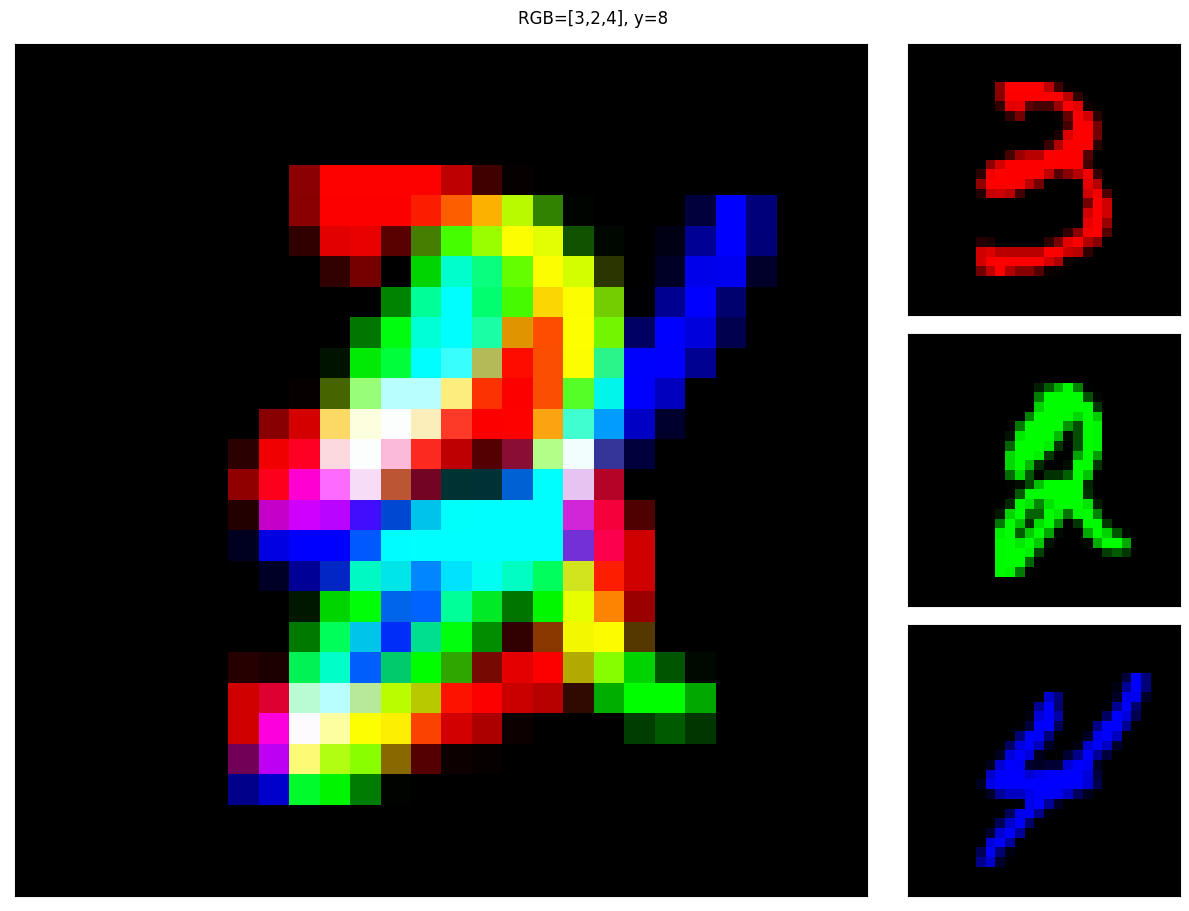

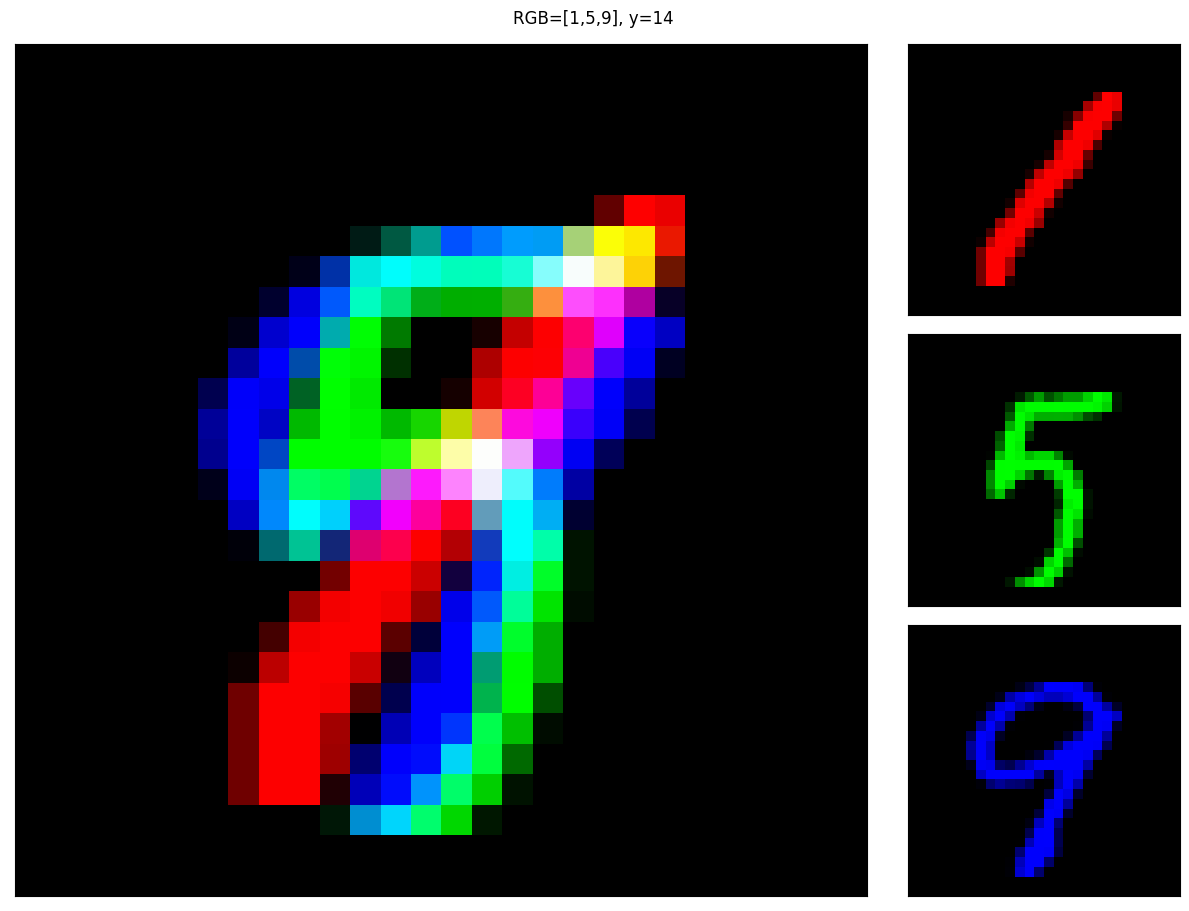

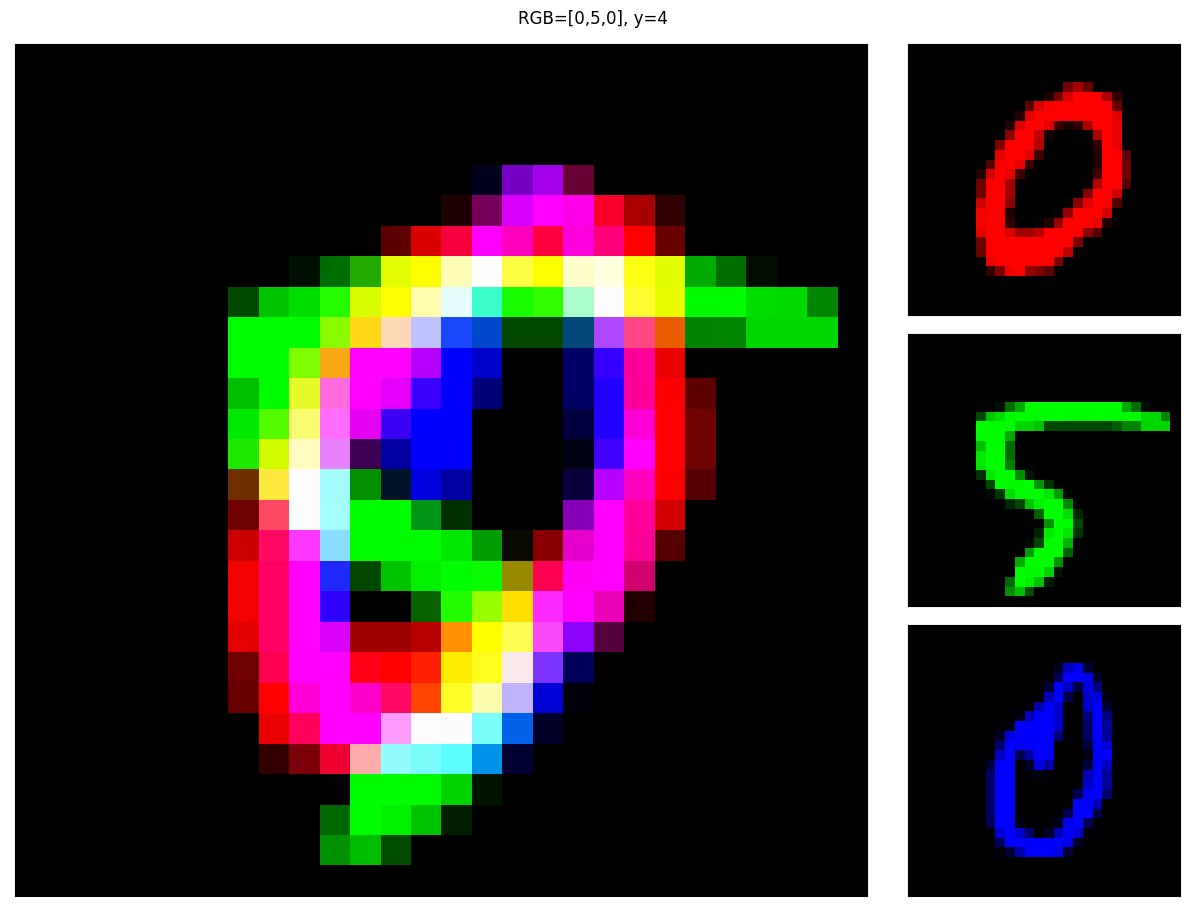

In [28]:
def show_mnist_examples(x, y, meta, titler):
    for i in range(3):
        fig = plt.figure(constrained_layout=True,figsize=(12,9), dpi=100)
        gs = fig.add_gridspec(3,4)
        main_ax = fig.add_subplot(gs[:3,:3])
        fig.suptitle(titler(meta[i], y[i]))
        main_ax.imshow(image_normalization(np.moveaxis(x[i], 0, -1)))
        disable_ax_ticks(main_ax)

        for j in range(3):
            c_ax = fig.add_subplot(gs[j,-1])
            subimage = x[i].copy()
            subimage[:j] = 0
            subimage[j+1:] = 0
            subimage[j] = subimage[j]-subimage[j].min()
            c_ax.imshow(image_normalization(np.moveaxis(subimage, 0, -1)))
            disable_ax_ticks(c_ax)
    plt.show()

titler_d0 = lambda x, y: "RGB=[{},{},{}], y={}".format(*x, y)
show_mnist_examples(train_x_d0, train_y_d0, metainfo_d0, titler_d0)

## Development Dataset 1: FashionMNIST
The second development dataset was just FashionMNIST. 

Our benchmark model scored a 92.87\% on this dataset, and the submission record was a 94.44\%, achievied by `Atech_AutoML`.

In [5]:
train_x_d1, train_y_d1 = process_torch_dataset('FashionMNIST', 1, location='devel', return_data=True)[0]
train_x_d1 = train_x_d1[:10]
train_y_d1 = train_y_d1[:10]

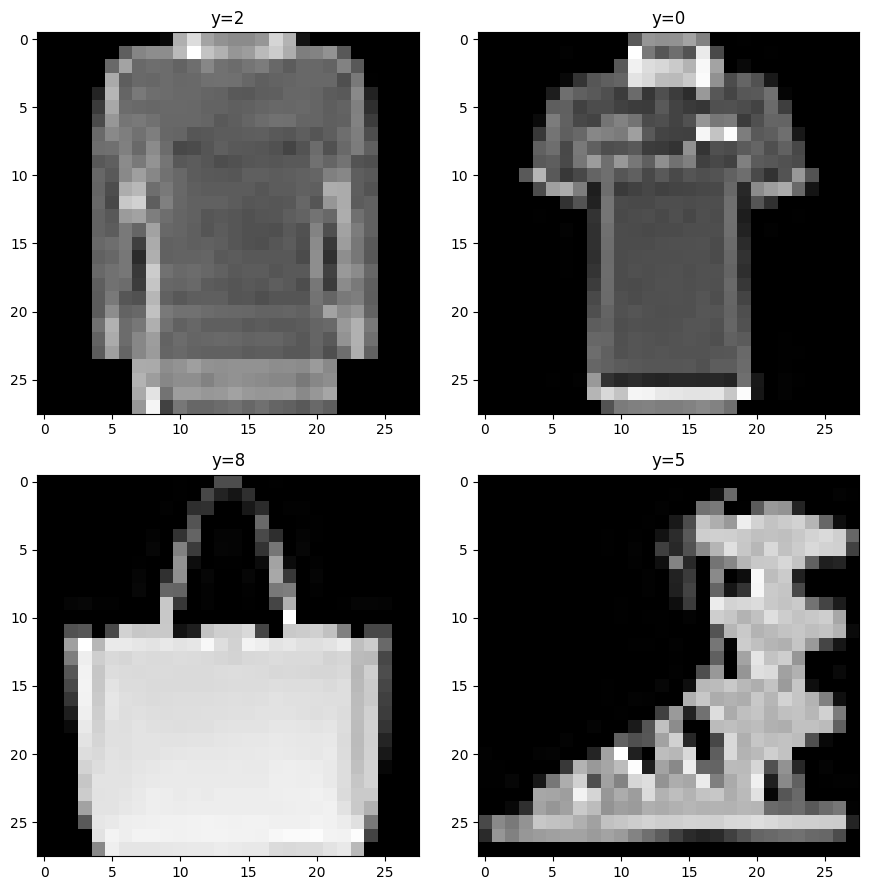

In [45]:
plt.figure(figsize=(9,9), dpi=100)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("y={}".format(train_y_d1[i]))
    plt.imshow(image_normalization(train_x_d1[i][0]), cmap='gray')
plt.tight_layout()
plt.show()

## Development Dataset 2: Language
The third development dataset was codenamed language. Here, we loaded the Aspell language dictionary for 10 lanauges that all use the Latin alphabet: English, Dutch, German, Spanish, French, Portuguese, Swedish, Zulu, Swahili, and Finnish. We then filtered these words to only those that use 6 letters total. Of these six letter words, all that used diacritics (letters such as é or ü), y, or z were removed, meaning there were 24 possible letters within each word. These words were then combined into random groups of 4, and one hot encoded. This creates a 24x24 matrix, which consistutes the input image. The six letter words were divided into train and test groups to prevent train/test leakage, meaning that there were no words shared across the train and test word sets used to generate the train and set images.


The image class refers to the original language that the four words come from.

Our benchmark model scored a 87.00\% on this dataset, and the submission record was 89.71\%, achieved by `yonga`. We were surprised by how well models could learn this data, given how random it looks to the human eye.

In [8]:
# this requires the aspell package, with the following languages installed: ['en', 'nl', 'de', 'es', 'fr', 'pt_PT', 'sw', 'zu', 'fi', 'sv']
(train_x_d2, train_y_d2), _, metainfo_d2, lang_idxs = load_language_data(metainfo=True, verbose=False)

In [49]:
lang_abbrevs = {
 'en':"English",
 'nl':"Dutch",
 'de':"German",
 'es':"Spanish",
 'fr':"French",
 'pt_PT':"Portuguese",
 'sw':"Swahili",
 'zu':"Zulu",
 'fi':"Finnish",
 'sv':"Swedish"
}
lang_ref = {v:lang_abbrevs[k] for k,v in lang_idxs.items()}
letters = 'abcdefghijklmnopqrstuvwx'

# get the first sample of each class
samples = []
for i in range(10):
    samples.append(np.where(train_y_d2 == i)[0][0])

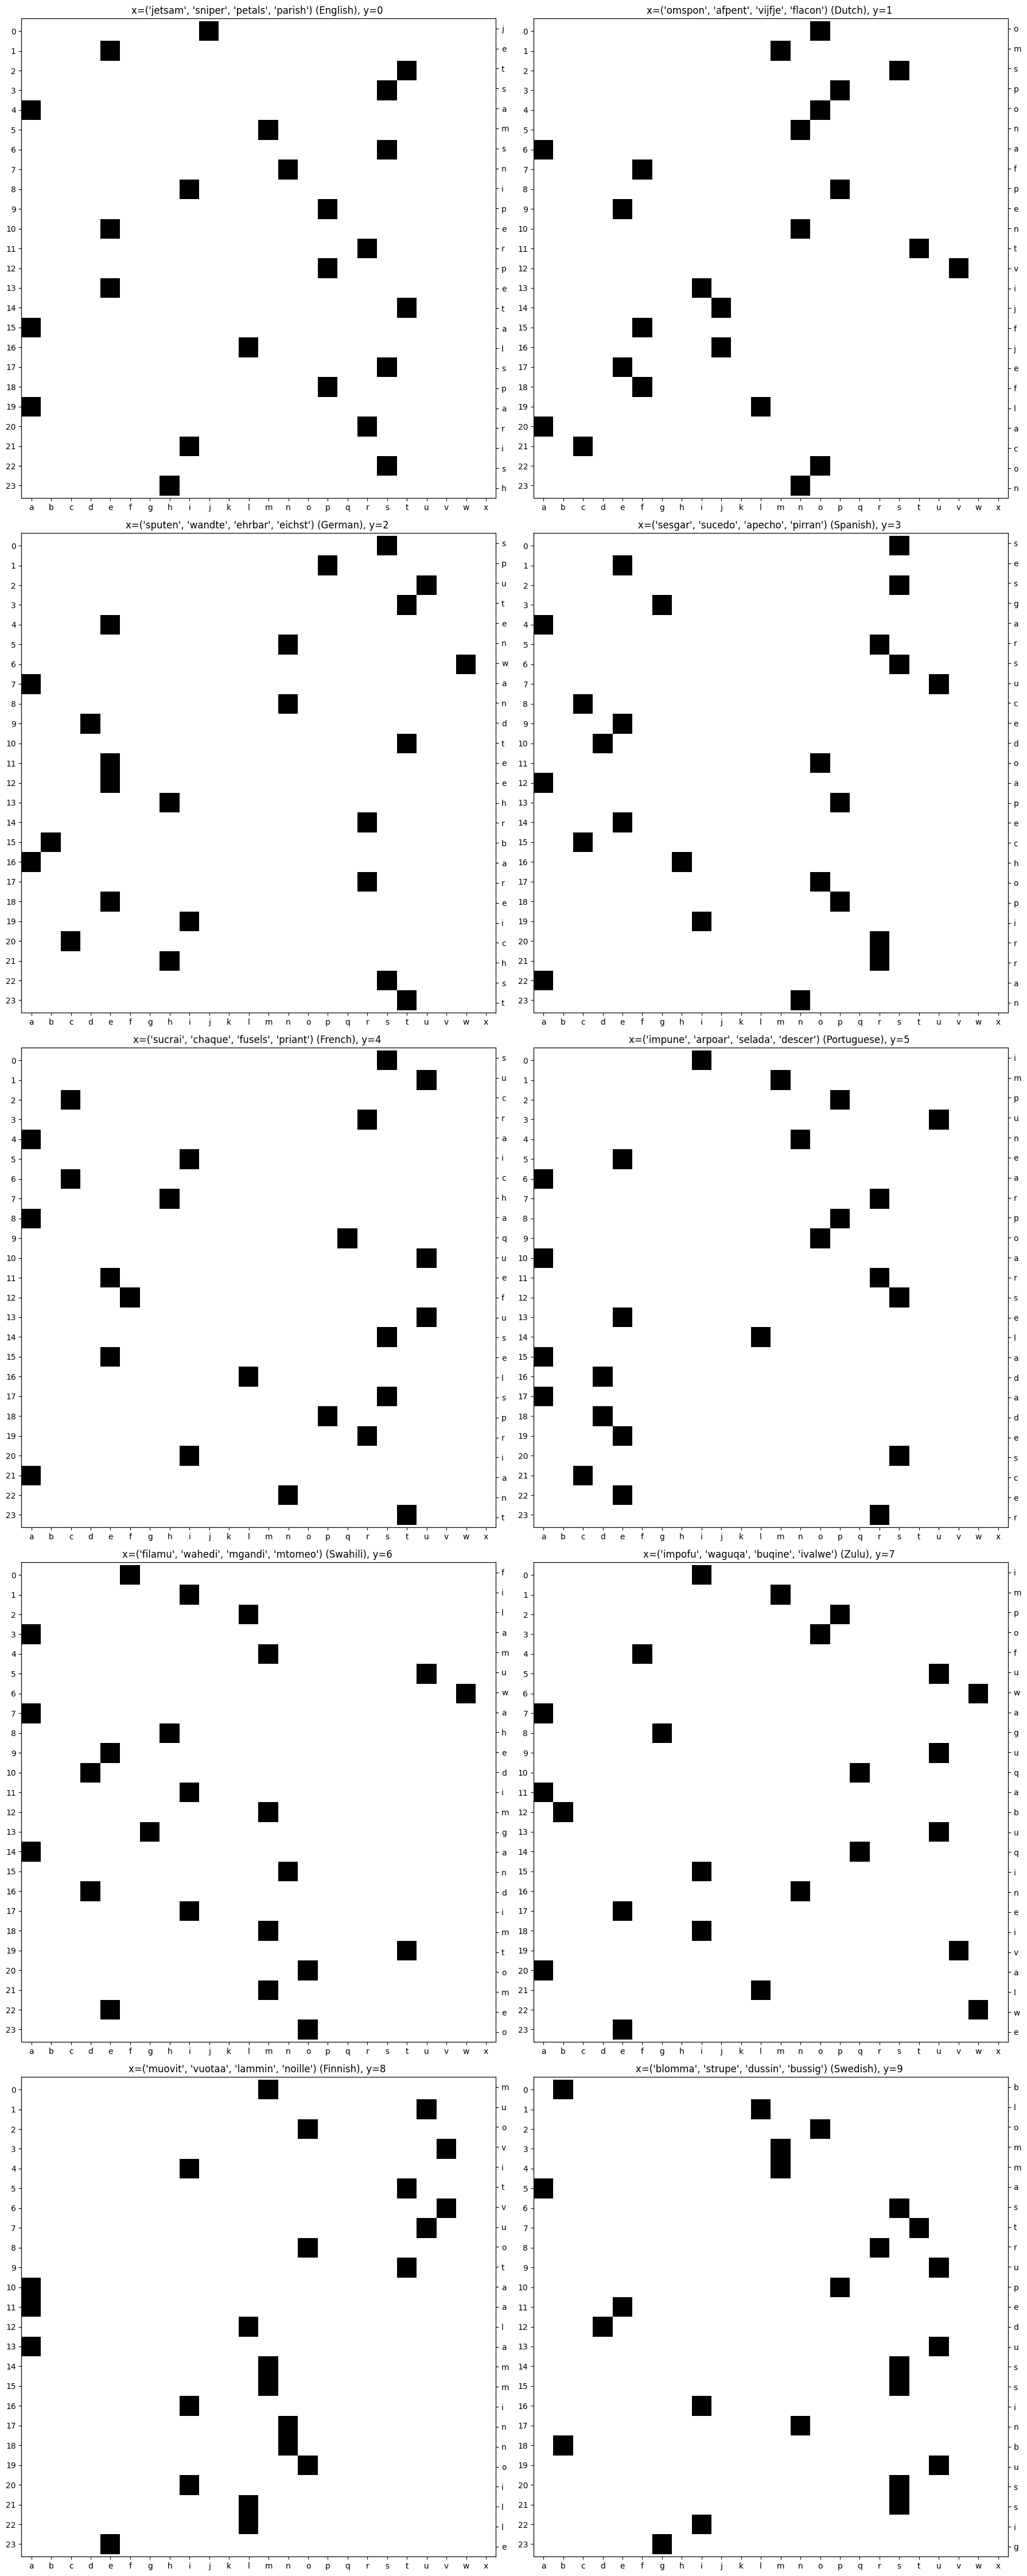

In [50]:
plt.figure(figsize=(9*2,9*5), dpi=100)
for idx, i in enumerate(samples):
    ax = plt.subplot(5,2,idx+1)
    ax.imshow(1-train_x_d2[i][0], cmap='gray')
    y = train_y_d2[i]
    full_phrase = "".join(metainfo_d2[i])
    ax.set_title("x={} ({}), y={} ".format(metainfo_d2[i], lang_ref[y], y))
    
    
    ax.set_xticks(np.arange(len(letters)))
    ax.set_xticklabels(letters)
    ax.set_yticks(np.arange(len(full_phrase)))
    ax.set_ylim(23.5,-.5)
    
    ax2 = ax.twinx()
    ax2.set_ylim(23.5,-.5)
    ax2.yaxis.set_label_position("right")
    ax2.set_yticks(np.arange(len(full_phrase)))
    ax2.set_yticklabels(full_phrase)
    
plt.tight_layout()
plt.show()

# Evaluation Data

## Evaluation Dataset 0: MultNIST
The first evaluation dataset was codenamed MultNIST. The process of this is very similar to AddNIST, except the output class is $(r * g* b)\mod 10$; the last digit of the product of $r$, $g$, and $b$. All other processing is identical to that of AddNIST.

Our benchmark model scored a 91.55\% on this dataset, and the submission record was 95.45\%, achieved by `Atech_AutoML`.

In [11]:
train_x_e0, train_y_e0, metainfo_e0  = load_multnist_data()[0]
train_x_e0 = train_x_e0[:10]
train_y_e0 = train_y_e0[:10]
metainfo_e0 = metainfo_e0[:10]

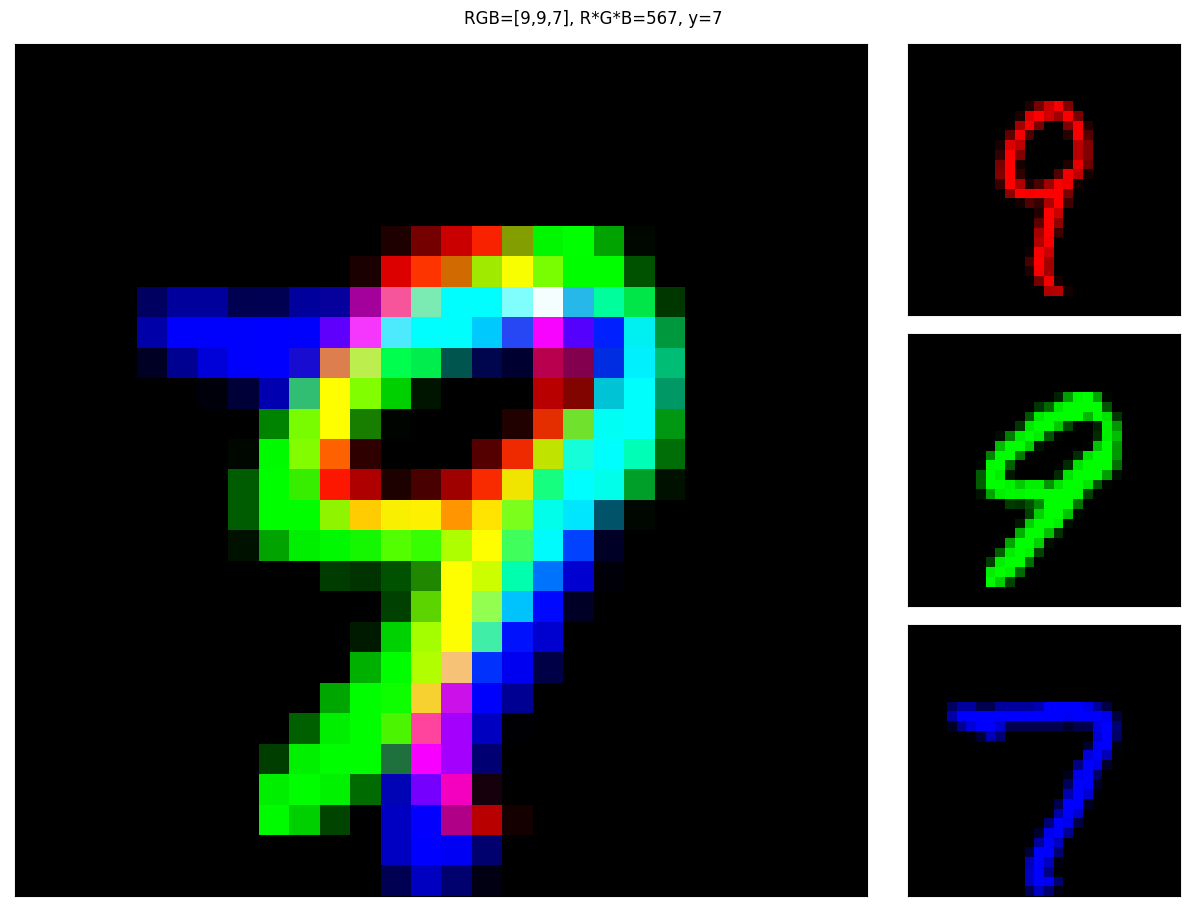

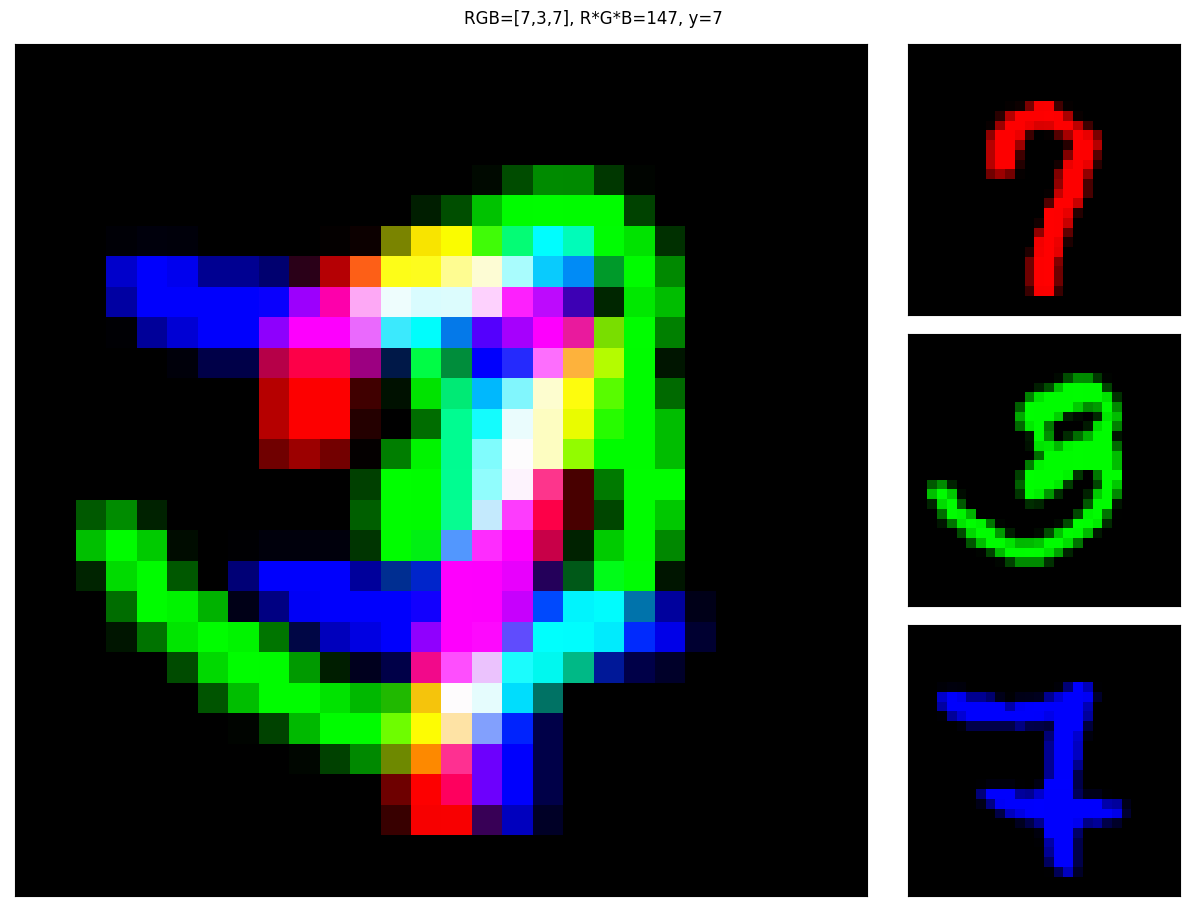

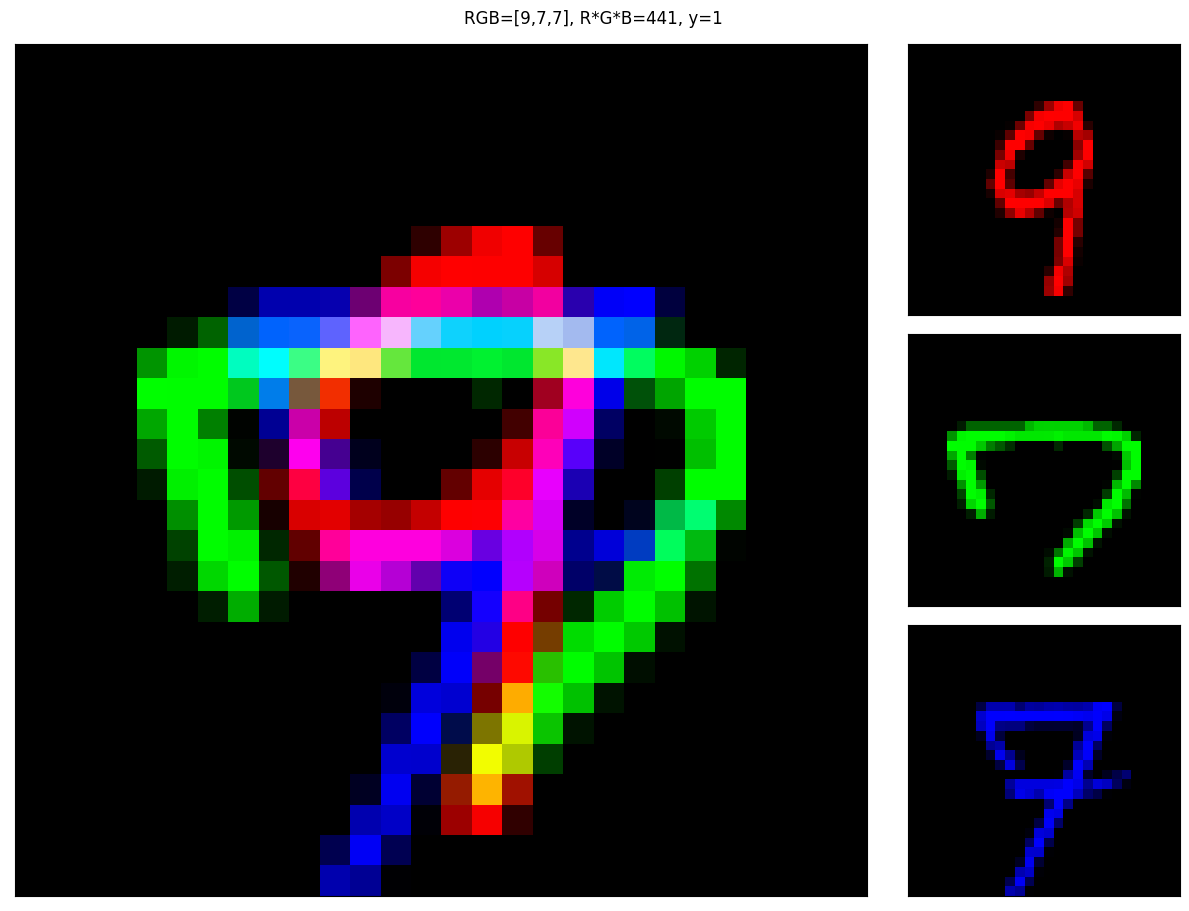

In [29]:
titler_e0 = lambda x, y: "RGB=[{},{},{}], R*G*B={}, y={}".format(*x, x[0]*x[1]*x[2], y)
show_mnist_examples(train_x_e0, train_y_e0, metainfo_e0, titler_e0)

## Evaluation Dataset 1: CIFARTile
The second evaluation dataset was codenamed CIFARTile. This takes images from CIFAR-10 and tiles them into a 2x2 grid. The label for the grid is the total number of discrete classes in the tiling _minus 1_ (to ensure that the classes are `0, 1, 2, 3`]. So for example, a tile of `[horse, horse, frog, cat]` has three discrete classes and thus has a label of 2. The train and validation data splits get images from the train set of CIFAR-10, while the test data split gets images from the test set. 

For each grid, a total number of classes `nclasses` is chosen between 1 and 4. If `nclasses` is:

1: 1 class is selected at random and all four images in the tile are from that one class. 

2: 2 classes are selected at random, and there are two images of each class in the tile, placed randomly into the tiling. 

3: 3 classes are selected at random. There are two images of the first class and one of the second and third, with the images placed randomly into the tiling. 

4: 4 classes are selected at random. There is one image of each class, placed randomly into the tiling.


Each individual image in the tile is processed as per the recommended CIFAR-10 augmentation and normalization policy used in the PyTorch documentation: a 32 pixel random crop with padding 4, a random horizontal flip, and a normalization around the global channel mean and standard deviation.

Our benchmark model scored a 45.56\% on this dataset, and the submission record was 73.08\%, achieved by `SRCB_VC_Lab`.

In [31]:
[train_x_e1, train_y_e1], _, metainfo_e1 = load_cifartile_data(metainfo=True)
del _

99/1000

In [42]:
samples = []
for i in range(4):
    samples.append(np.where(train_y_e1 == i)[0][0])
cifar_labels = ["airplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

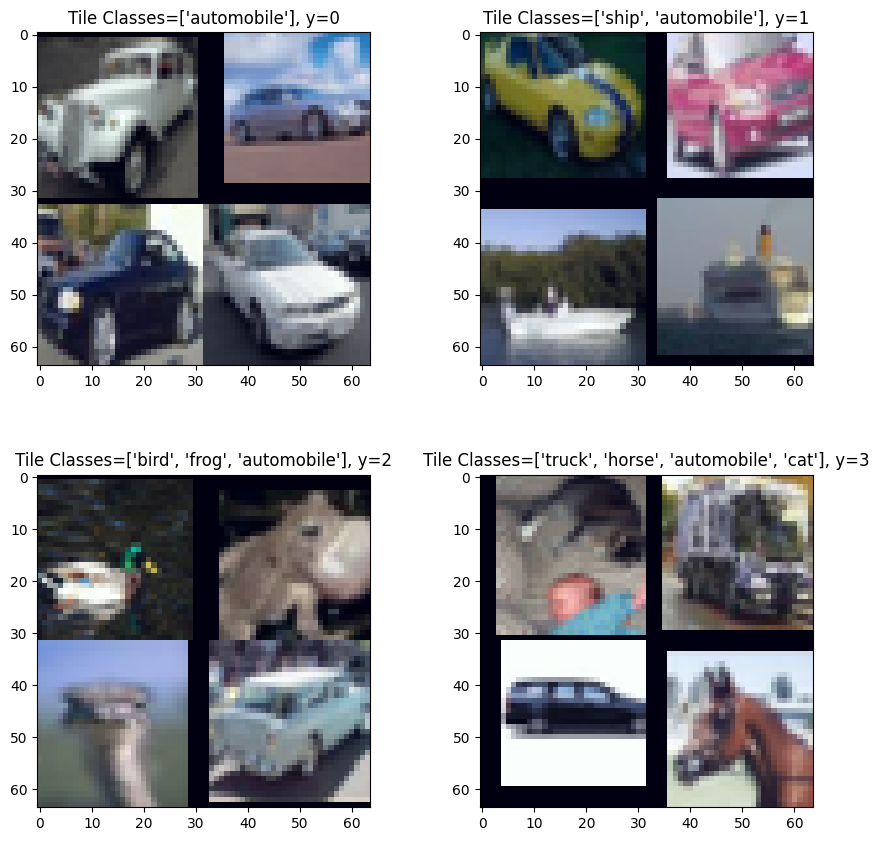

In [43]:
plt.figure(figsize=(9,9), dpi=100)
for idx, i in enumerate(samples):
    plt.subplot(2,2,idx+1)
    classes = [cifar_labels[m] for m in metainfo_e1[i]]
    plt.title("Tile Classes={}, y={}".format(classes, train_y_e1[i]))
    plt.imshow(np.moveaxis(image_normalization(train_x_e1[i]), 0, -1))
plt.tight_layout()
plt.show()

## Evaluation Dataset 2: Gutenberg
The third evaluation dataset was codenamed Gutenberg. Here, the following texts were downloaded from Project Gutenberg from six different authors:

* `Thomas Aquinas`: Summa I-II, Summa Theologica, Part III, On Prayer and the Contemplative Life
* `Confucius`: The Sayings of Confucius, The Wisdom of Confucius
* `Hawthorne`: The Scarlet Letter, The House of the Seven Gables
* `Plato`: The Republic, Symposium, Laws
* `Shakespeare`: Romeo and Juliet, Macbeth, Merchant of Venice, King Lear, Twelfth Night
* `Tolstoy`: War and Peace, Anna Karenina

Each text was an English translation of the source material, with authors chosen to represent a wide variety of cultures, time periods, and languages. From each text, basic text preprocessing is performed; removing punctuation, mapping diacritics to their base letters, and removing common 'structure' words (things like "chapter", "scene" or "prologue". The texts were then split into sequences of words. From these word sequences, consecutive sequences of three words that were between 3 and 6 letters long were extracted, called "phrases". Phrases that appeared in multiple authors' corpuses were removed. Each word in each phrase were padded with underscores if they were shorted than 6 letters. These phrases were then one-hotted, and the label corresponds to the original author that wrote the phrase. For example, for Shakespeare, you might have something like `such__sweet_sorrow` or `lady__doth__protest`.


Our benchmark model scored a 40.98\% on this dataset, and the submission record was 50.85\%, achieved by `Atech_AutoML`.

In [16]:
[train_x_e2, train_y_e2], _, metainfo_e2 = load_gutenberg(metainfo=True)

In [47]:
samples = []
for i in range(6):
    samples.append(np.where(train_y_e2 == i)[0][0])
author_ref = ['aquinas', 'confucius', 'hawthorne', 'plato', 'shakespeare', 'tolstoy']
lat_letters = 'abcdefghijklmnopqrstuvwxyz '
print(len(samples))

6


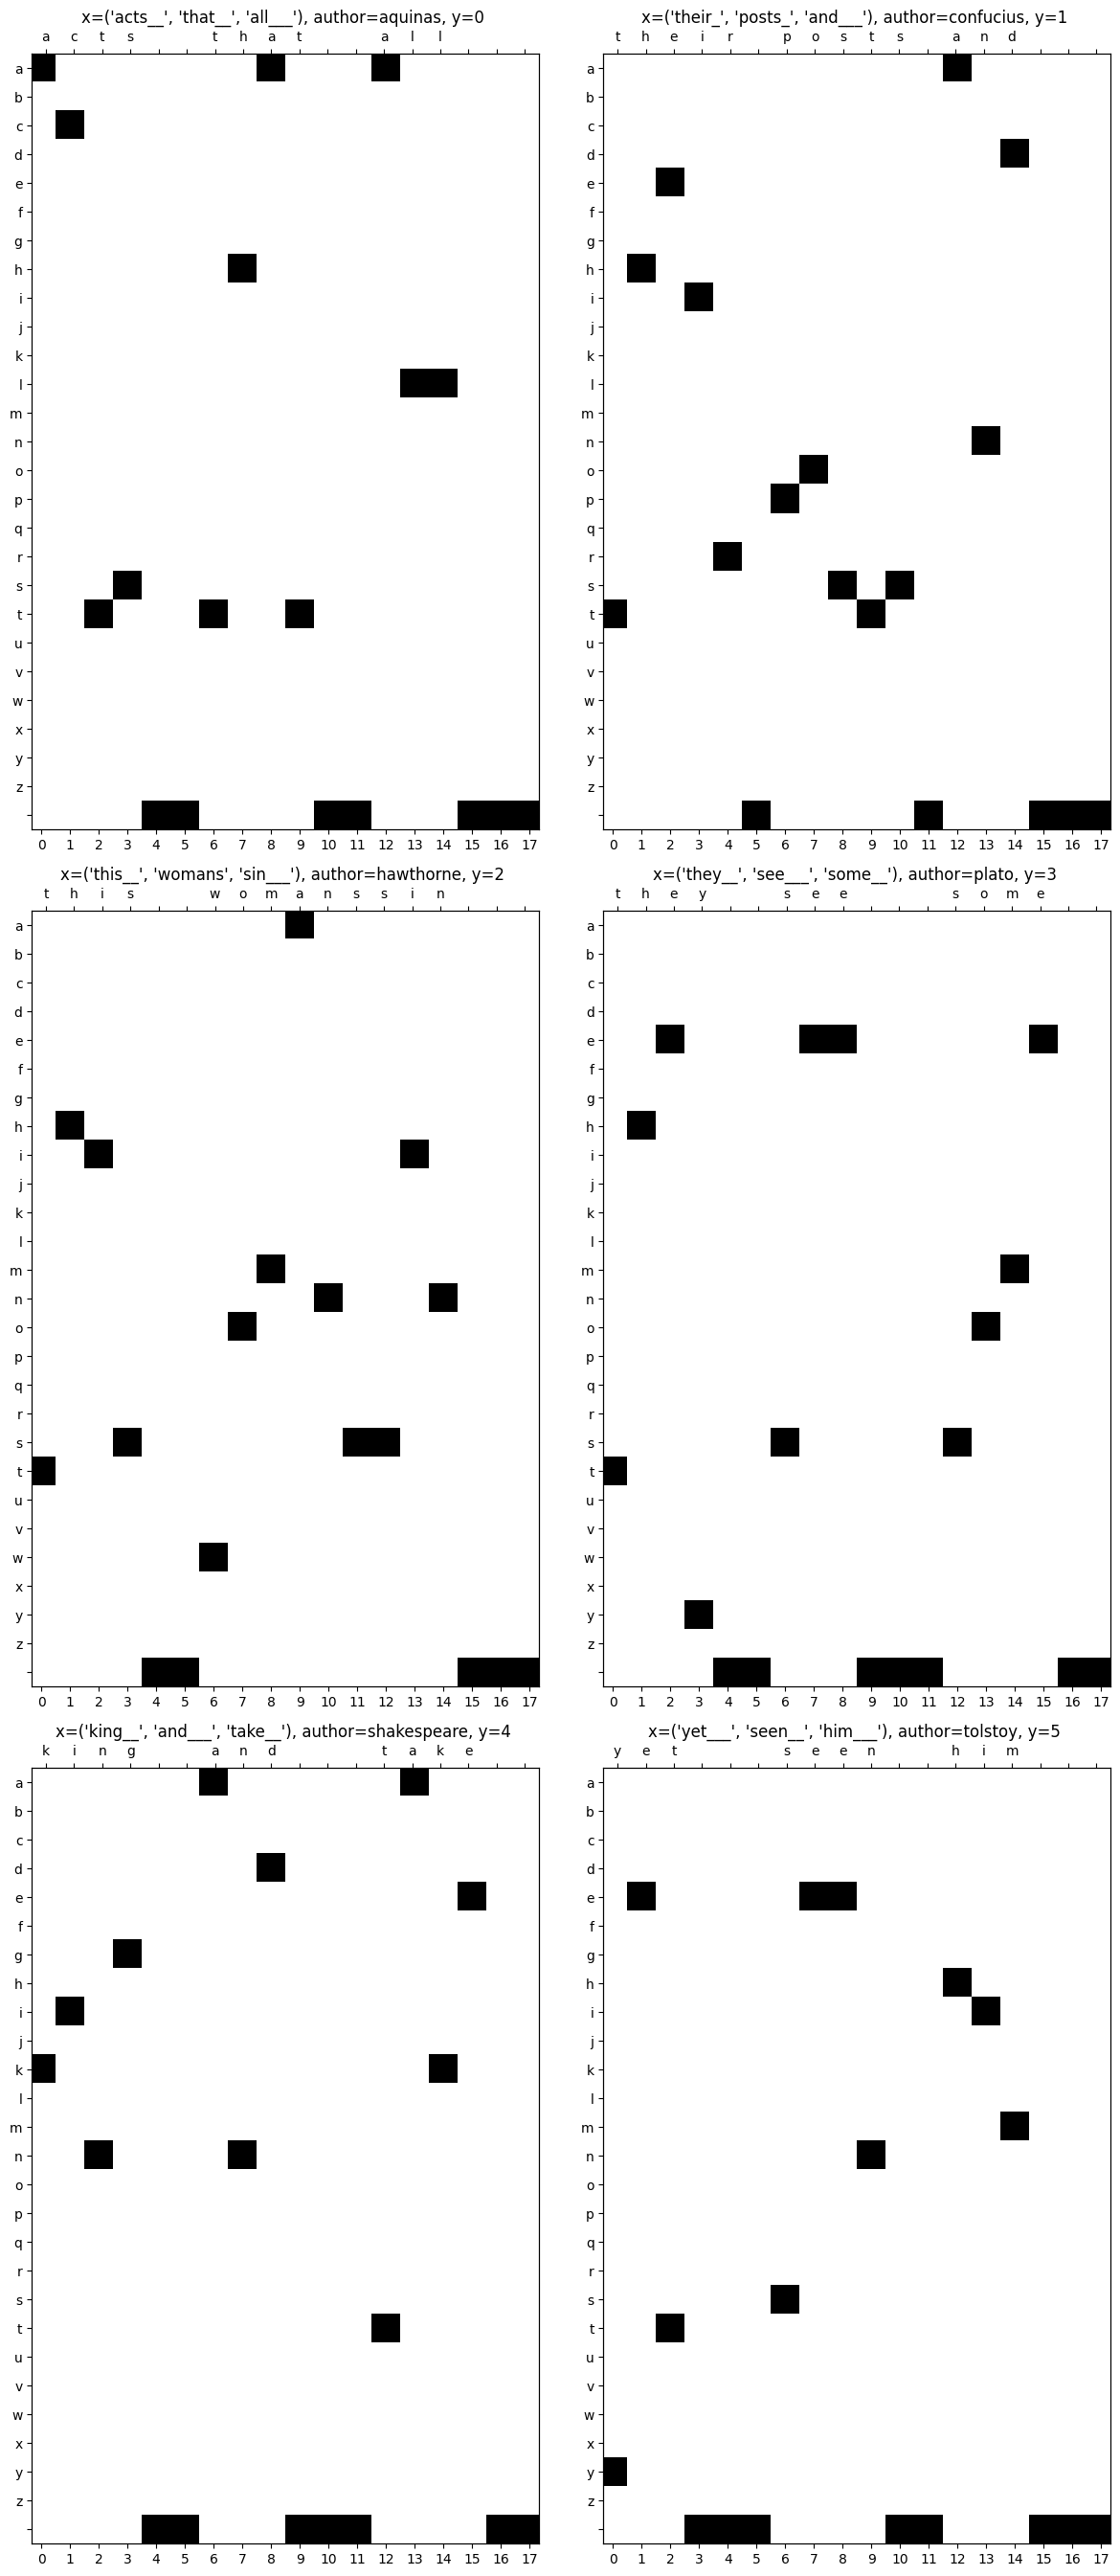

In [48]:
plt.figure(figsize=(6*2,9*3), dpi=100)
for idx, i in enumerate(samples):
    ax = plt.subplot(3,2,idx+1)
    ax.imshow(1-train_x_e2[i][0], cmap='gray',origin='upper')
    y = train_y_e2[i]
    full_phrase = "".join(metainfo_e2[i]).replace("_"," ")
    ax.set_title("x={}, author={}, y={} ".format(metainfo_e2[i], author_ref[y], y))
    
    ax.set_yticks(np.arange(len(lat_letters)))
    ax.set_yticklabels(lat_letters)
    
    ax.set_xticks(np.arange(len(full_phrase)))
    ax.set_xlim(-.5,17.5)
    
    ax2 = ax.twiny()
    ax2.set_xlim(-.5, 17.5)
    ax2.xaxis.set_label_position("top")
    ax2.set_xticks(np.arange(len(full_phrase)))
    ax2.set_xticklabels(full_phrase)
    
plt.tight_layout()
plt.show()